## Imputation of Missing Numerical Values 


In [120]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [121]:
df=pd.read_csv('titanic_toy.csv')

In [122]:
df.sample(5)

,Age,Fare,Family,Survived
151,22.0,66.6000,1,1
217,42.0,27.0000,1,0
890,32.0,7.7500,0,0
382,32.0,7.9250,0,0
499,24.0,7.7958,0,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [124]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived'],axis=1),df['Survived'],test_size=0.2, random_state=42)

In [126]:
X_train.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     572 non-null    float64
 1   Fare    676 non-null    float64
 2   Family  712 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 22.2 KB


In [129]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [130]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()
mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [131]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)

In [141]:
X_train.head()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


In [142]:
print('original Age Variable Variance:', X_train['Age'].var())
print('Mean Age Variable Variance:', X_train['Age_mean'].var())
print('Median Age Variable Variance:', X_train['Age_median'].var())

original Age Variable Variance: 210.2517072477435
Mean Age Variable Variance: 168.85193366872227
Median Age Variable Variance: 169.20731007048155


In [143]:
print('original Fare Variable Variance:', X_train['Fare'].var())
print('Mean Fare Variable Variance:', X_train['Fare_mean'].var())
print('Median Fare Variable Variance:', X_train['Fare_median'].var())

original Fare Variable Variance: 2761.0314349486343
Mean Fare Variable Variance: 2621.232374951235
Median Fare Variable Variance: 2637.012481677765


In [144]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


Text(0.5, 1.0, 'Distribution of the age')

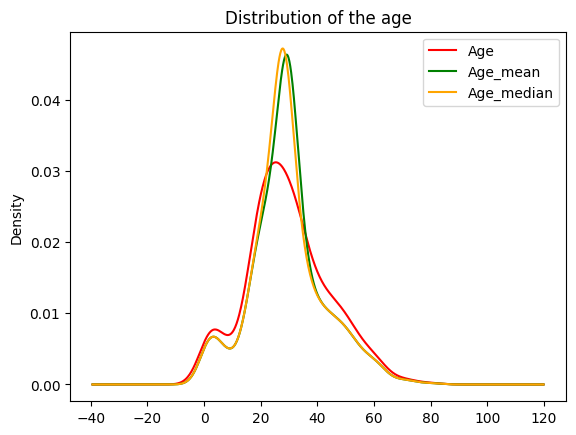

In [145]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax, color='red')
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')
X_train['Age_median'].plot(kind='kde', ax=ax, color='orange')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Distribution of the age')


Text(0.5, 1.0, 'Distribution of the Fare')

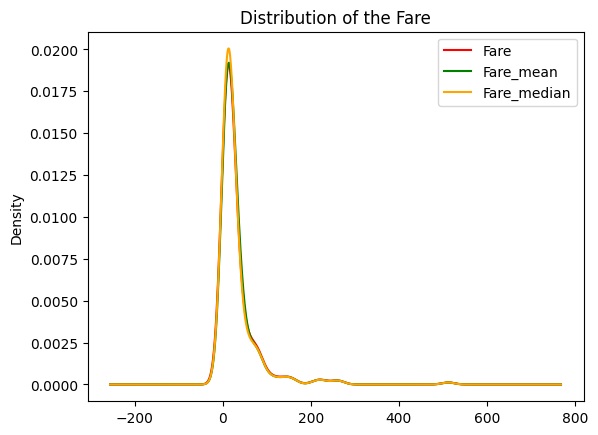

In [146]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Fare'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')
X_train['Fare_median'].plot(kind='kde', ax=ax, color='orange')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Distribution of the Fare')


- Not any significant change in the distribution of the fare so we can do the imputation in the fare

<Axes: >

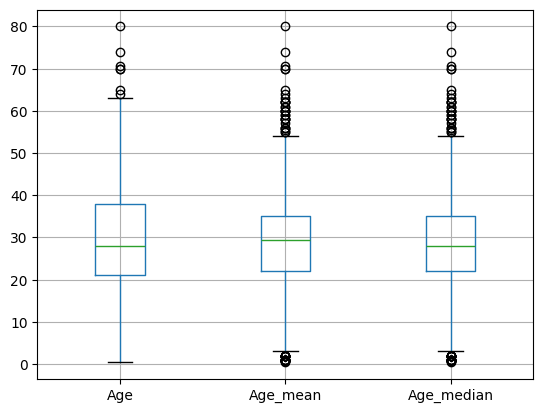

In [147]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

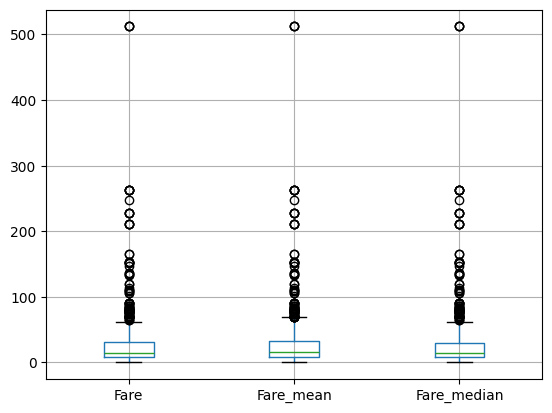

In [148]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [150]:
X_train.shape

(712, 7)

In [151]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')


In [152]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],force_int_remainder_cols=False)

In [153]:
trf.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False,
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [155]:
X_train1=trf.transform(X_train)

In [158]:
X_train1

array([[ 45.5       ,  28.5       ],
       [ 23.        ,  13.        ],
       [ 32.        ,   7.925     ],
       ...,
       [ 41.        ,  32.51778772],
       [ 14.        , 120.        ],
       [ 21.        ,  77.2875    ]])

In [161]:
X_train1

array([[ 45.5       ,  28.5       ],
       [ 23.        ,  13.        ],
       [ 32.        ,   7.925     ],
       ...,
       [ 41.        ,  32.51778772],
       [ 14.        , 120.        ],
       [ 21.        ,  77.2875    ]])

In [157]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


## Arbitrary Imputation

In [162]:
X_train['age_99']=X_train['Age'].fillna(99)
X_train['age_minus1']=X_train['Age'].fillna(-1)
X_train['fare_99']=X_train['Fare'].fillna(99)
X_train['fare_minus1']=X_train['Fare'].fillna(-1)

In [164]:
print("original age variance:",X_train['Age'].var())
print("Age 99 variance:",X_train['age_99'].var())
print("Age minus1 variance:",X_train['age_minus1'].var())

print("original fare variance:",X_train['Fare'].var())
print("fare 99 variance:",X_train['fare_99'].var())
print("fare minus1 variance:",X_train['fare_minus1'].var())

original age variance: 210.2517072477435
Age 99 variance: 932.9665366701432
Age minus1 variance: 315.9955036260055
original fare variance: 2761.0314349486343
fare 99 variance: 2833.708690936761
fare minus1 variance: 2675.2394049177024


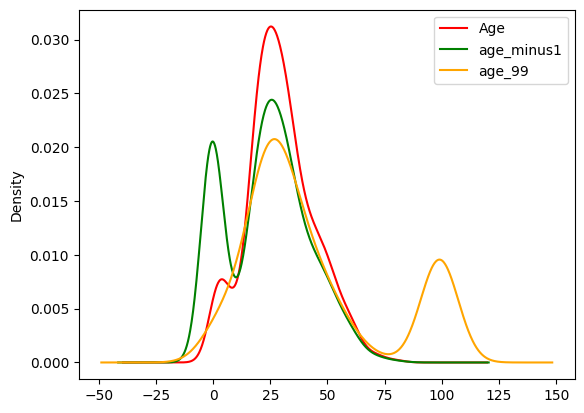

In [173]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax, color='red')
X_train['age_minus1'].plot(kind='kde',ax=ax, color='green')
X_train['age_99'].plot(kind='kde',ax=ax, color='orange')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels)


In [174]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median,age_99,age_minus1,fare_99,fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536,-0.135079,-0.168329,0.196548,0.203212
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346,0.425422,0.730992,0.087393,0.082612
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416,0.383501,0.761497,0.092813,0.087547
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003,-0.067972,0.141643,0.961779,0.989855
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000,-0.065991,0.138471,0.937714,0.997880
age_99,1.000000,-0.069365,-0.135079,0.425422,0.383501,-0.067972,-0.065991,1.000000,-0.306576,-0.071667,-0.064017
age_minus1,1.000000,0.145071,-0.168329,0.730992,0.761497,0.141643,0.138471,-0.306576,1.000000,0.145956,0.135159
fare_99,0.091016,1.000000,0.196548,0.087393,0.092813,0.961779,0.937714,-0.071667,0.145956,1.000000,0.913115
